## Skoltech
## Intro to data science, fall 2020
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification task and use classification performance metrics
- Get the taste of gradient boosting approach


# Submiting the answers

Google form to submit your answers: https://docs.google.com/forms/d/1zwUO1KZNDTZYuD12dyMO3CaErGHnZuHx1Mdbo-c11ME/

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then it must be provided with **3 decimals after the floating point**, e.g. 1.234

---

If your answer is a ``list of float or integer numbers or str``, then they should be reported in descending (alphabetical) order,  divided by a comma, e.g.:

10.453,9.112,5.001,5.000

---

The last part (Q5) do not have corresponding fields in the google form. It is **not optional** and it will be graded manually from your .ipynb file.

---

If you have any questions regarding this Home Assignment, ask them piazza topic: https://piazza.com/class/kespugtqfrn12g?cid=29

#### Import basic libraries

In [1879]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### Dataset
For the task we'll use kickstarter dataset. Kickstarter is the crowdfounding platform, where people can announce their project with financial goals and other can support the projects by paying the money ("pledging"). The goal will be to predict if the project will be successfull, i.e. would it achieve the funding goal. Let's take a brief look to the dataset.

In [1880]:
df = pd.read_csv('ks-projects-201801.csv')
df.set_index("ID", inplace=True)

In [1881]:
df.sample(3)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1240772139,Learn fashion design with the SnapFashun onlin...,Fashion,Fashion,CAD,2016-03-16,20000.0,2016-02-15 13:46:00,723.0,failed,10,CA,522.05,557.53,15422.58
302922572,Digital Sisterhood Part 2,Nonfiction,Publishing,USD,2011-06-28,500.0,2011-03-30 22:38:46,701.0,successful,28,US,701.00,701.00,500.00
452797454,HUMANITY STRONG COLLECTION,Apparel,Fashion,CAD,2017-10-08,10000.0,2017-09-08 17:47:39,340.0,canceled,2,CA,278.01,272.02,8000.64


In [1882]:
df.shape

(378661, 14)

In [1883]:
df.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

# Section 1. Dataset acquaintance

### Q1.1

#### How many NaN values are there in the dataset?

In [1884]:
nans = df.isnull().sum().sum()
print('        nans=',nans)
df = df.dropna()

        nans= 3801


In [1885]:
nans = df.isnull().sum().sum()
print('        nans=',nans)

        nans= 0


In [1886]:
df.shape

(374860, 14)

Let us simplify the task a little bit: we are aiming to predict either project fails or not.
Thus 'success' projects will be encoded as 1, with state ['failed', 'canceled'] as 0 and we remove the rows with any other state.

### Q1.2 
#### How many '1' values are in resulting dataset (in state column)?

In [1887]:
df = df.drop(df[df.state == 'suspended'].index) # delete rows with state 'suspended'
df = df.drop(df[df.state == 'live'].index) # delete rows with state 'live'
df = df.drop(df[df.state == 'undefined'].index) # delete rows with state 'undefined'
print('shape =',df.shape)
print(df.state.value_counts())

shape = (370219, 14)
failed        197611
successful    133851
canceled       38757
Name: state, dtype: int64


In [1888]:
df['state'] = (df['state'] == 'successful').astype(int) #if state == 'successful'->int(True) else int(False)
print(df.state.value_counts())

0    236368
1    133851
Name: state, dtype: int64


In [1889]:
numof1 = df[df['state'] == 1].shape[0] #show number of columns with '1' value in state column
print('        numof1 = ',numof1)

        numof1 =  133851


In [1890]:
df.sample(3)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
2065342395,Female Adventurers:The Women who Helped Coloni...,Nonfiction,Publishing,USD,2013-07-03,3100.0,2013-06-03 21:25:15,1538.0,0,20,US,1538.0,1538.0,3100.0
443885149,FLUX SEAMLESS Fashion + Technology + Sustainab...,Fashion,Fashion,USD,2013-12-23,30000.0,2013-11-18 21:46:24,1053.0,0,20,US,1053.0,1053.0,30000.0
2084657936,Pea Pod Pixie Gift Shop LLC,DIY,Crafts,USD,2017-05-12,800.0,2017-04-12 02:46:04,205.0,0,5,US,125.0,205.0,800.0


### Q1.3
#### Whats is a name of a project attracted the biggest pay check? (on average). Use column usd_pledged_real to judge. If there are multiple projects, choose any single one.

In [1891]:
k1 = (df['usd_pledged_real']/df['backers']).sort_values()
k1

ID
1794731243    0.45
1466342924    0.47
52860221      0.48
210794368     0.48
611264761     0.49
              ... 
99984851       NaN
99991751       NaN
999931480      NaN
99996661       NaN
999976312      NaN
Length: 370219, dtype: float64

In [1892]:
k2 = k1.replace(np.inf, np.nan)
k2

ID
1794731243    0.45
1466342924    0.47
52860221      0.48
210794368     0.48
611264761     0.49
              ... 
99984851       NaN
99991751       NaN
999931480      NaN
99996661       NaN
999976312      NaN
Length: 370219, dtype: float64

In [1893]:
k3 = k2.dropna()
k3

ID
1794731243        0.45
1466342924        0.47
52860221          0.48
210794368         0.48
611264761         0.49
                ...   
2024799289    10000.00
1974395971    10000.00
472233286     10000.00
1767293256    10000.00
912587650     10000.00
Length: 319569, dtype: float64

In [1894]:
k4 = df[df.index == k3.index[-1]]
k4

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
912587650,The Hare On The Chair - An Easter Legend,Children's Books,Publishing,USD,2015-05-03,48000.0,2015-04-03 10:46:03,10000.0,0,1,US,10000.0,10000.0,48000.0


In [1895]:
k4.name

ID
912587650    The Hare On The Chair - An Easter Legend
Name: name, dtype: object

### Q1.4
#### What is the most successful main category (in terms of success percentage)?

In [1896]:
#find mean of each category, then sort in asc ordrer and take the max value (end; -1 element)
k5 = df.groupby('main_category')['state'].mean().sort_values()
print(k5)
print('        the most successful main category = ',k5.index[-1])

main_category
Technology      0.202544
Journalism      0.216656
Crafts          0.244198
Fashion         0.249420
Food            0.250793
Photography     0.309602
Publishing      0.315271
Design          0.357411
Games           0.360552
Film & Video    0.379328
Art             0.413107
Music           0.490927
Comics          0.544963
Theater         0.602212
Dance           0.625803
Name: state, dtype: float64
        the most successful main category =  Dance


### Q1.5
#### Define the category with highest goal per project. How many projects belong to it?  (note: we use category here, not main_category)

In [1897]:
k6 = df.groupby('category')['goal'].mean().sort_values()
print(k6)
k7 = k6.index[-1]
print()
print(k7)
print()
met = df[df['category'] == k7].shape[0]
print('        most exp cat met = ', met)

category
Crochet              3.781049e+03
Taxidermy            4.187636e+03
Stationery           4.213168e+03
Poetry               5.342948e+03
Candles              5.678515e+03
                         ...     
Science Fiction      4.299817e+05
Architecture         4.765797e+05
Fantasy              6.216058e+05
Space Exploration    6.245547e+05
Movie Theaters       1.594601e+06
Name: goal, Length: 159, dtype: float64

Movie Theaters

        most exp cat met =  227


### Q1.6
#### What is the category with biggest total pledge? Use 'usd_pledged_real' to judge.

In [1898]:
k8 = df.groupby('category')['usd_pledged_real'].sum().sort_values()
print(k8)
k9 = k8.index[-1]
print()
print('        cat with bigst tot pled = ',k9)

category
Taxidermy          3.742699e+04
Crochet            4.820144e+04
Embroidery         9.480322e+04
Quilts             1.704812e+05
Literary Spaces    1.891494e+05
                       ...     
Documentary        1.387601e+08
Hardware           1.540924e+08
Video Games        2.157557e+08
Tabletop Games     4.625848e+08
Product Design     6.284380e+08
Name: usd_pledged_real, Length: 159, dtype: float64

        cat with bigst tot pled =  Product Design


As one can notice, there are both numerical and object-type data in our dataframe. 

We suggest you to split them to perform EDA separately. 

### Q1.7
#### Split columns to 'numeric' (by data type) and object-type. How many 'object-type' features are there?

In [1899]:
k10 = df.dtypes
print(k10)
dfObj = pd.DataFrame()
dfNum = pd.DataFrame()
for index,i in enumerate(k10):
    if i == 'object':
        dfObj[k10.index[index]] = df[k10.index[index]]
    else:
        dfNum[k10.index[index]] = df[k10.index[index]]
print()
print('        obj features = ', dfObj.shape[1])

name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                 int32
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

        obj features =  7


In [1900]:
dfObj.sample(3)

,name,category,main_category,currency,deadline,launched,country
ID,,,,,,,
1355757006,The Brotherhood of the Traveling Alcoholics,Nonfiction,Publishing,USD,2012-10-13,2012-08-14 19:53:31,US
851321391,Poppa De Luca's Chicken Sauce,Food,Food,USD,2014-10-10,2014-09-10 01:52:53,US
813077511,KeyFlip,Product Design,Design,USD,2013-03-01,2013-01-26 03:52:59,US


In [1901]:
dfNum.sample(3)

,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,
553193447,35000.0,0.0,0,0,0.0,0.0,35000.0
455076750,6500.0,863.0,0,22,863.0,863.0,6500.0
725169603,6500.0,6645.0,1,41,6645.0,6645.0,6500.0


In [1902]:
df.sample(3)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1970585802,Arcane Sally & Mr. Steam #3,Webcomics,Comics,USD,2017-04-17,10500.0,2017-03-29 18:40:55,3236.00,0,142,US,304.00,3236.00,10500.0
1284874342,SIN - A Photo Book,Photography,Photography,USD,2011-10-04,1500.0,2011-09-04 08:57:57,15.00,0,1,US,15.00,15.00,1500.0
834469615,LEGEND - A Civil War Thriller from Historical ...,Film & Video,Film & Video,USD,2012-06-01,10000.0,2012-04-23 22:31:57,131.66,0,3,US,131.66,131.66,10000.0


### Q1.8
#### Let's do a bit of feature engineering. Let's create column 'pledge2goal' which define as ratio of usd_pledged_real to goal. How many outliers are there?
#### (We use a simple rule: an object is an outlier if it does not belong to [q25 - 1.5iqr, q75 + 1.5 iqr] interval, where qxx -- xx quantile, and iqr is inter-quantile range.)

In [1903]:
df['pledge2goal'] = df.usd_pledged_real/df.goal
df

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pledge2goal
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,0.000000
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,0.080700
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,0.004889
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00,0.000200
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00,0.065795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,0,1,US,25.0,25.0,50000.00,0.000500
999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,0,5,US,155.0,155.0,1500.00,0.103333
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,0,1,US,20.0,20.0,15000.00,0.001333


In [1904]:
Q1 = df.pledge2goal.quantile(0.25)
Q3 = df.pledge2goal.quantile(0.75)
IQR = Q3 - Q1
outliers = (df.pledge2goal < (Q1 - 1.5 * IQR)) | (df.pledge2goal > (Q3 + 1.5 * IQR))
n_outliers = (outliers).sum()
print('outliers = ', n_outliers)

outliers =  18415


In [1905]:
#drop outliers
k = df.drop(df[outliers == True].index)
k

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pledge2goal
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,0.000000
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,0.080700
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,0.004889
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00,0.000200
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00,0.065795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,0,1,US,25.0,25.0,50000.00,0.000500
999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,0,5,US,155.0,155.0,1500.00,0.103333
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,0,1,US,20.0,20.0,15000.00,0.001333


### Q1.9
#### Visualize the feature for success and fail cases. What can you say about received distributions? (use bins=10 or 20). Type letter as your answer
- A. Distributions intersect significantly, hard to say for sure that the ratio matters.
- B. Distributions have almost no intersection, the bigger ratio, the bigger success.
- C. Distributions intersect significantly, the bigger ratio, the bigger success
- D. Distributions have almost no intersection, the less ratio, the bigger success.

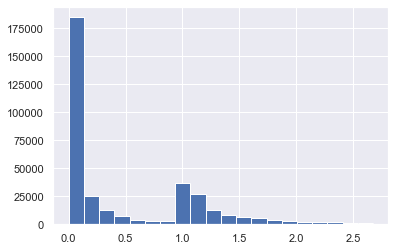

In [1906]:
bars, bins, _ = plt.hist(k['pledge2goal'], bins = 20)

Answer: D. Distributions have almost no intersection, the less ratio, the bigger success.

### Q1.10
#### Continue with plot from Q1.9. Where are the peaks located? We expect two numbers here as the answer

In [1907]:
bars

array([184790.,  25042.,  12954.,   6990.,   3899.,   3015.,   2762.,
        37276.,  26740.,  12940.,   8190.,   6614.,   5388.,   3857.,
         2844.,   2396.,   1910.,   1629.,   1324.,   1244.])

In [1908]:
bmax1 = sorted(bars)[-1]
bmax2 = sorted(bars)[-2]

In [1909]:
bars == bmax1

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [1910]:
bars == bmax2

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [1911]:
print(str(round(bins[7],3))+','+str(bins[0]))

0.936,0.0


### Q1.11
#### Compute Pearson correlation coefficient between the pledge2real and target variable.

In [1912]:
print('Pearson correlation = ',round(df.corr(method='pearson').pledge2goal.state,3))

Pearson correlation =  0.015


### Q1.12
#### Visualize dependancy of numerical data with success. What can you say about it?

amount of backers per unsuccessful project


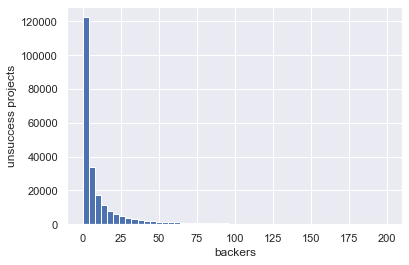

In [1913]:
plt.hist(k.backers[k.state==0], range=(0,200), bins = 50);
print('amount of backers per unsuccessful project')
plt.ylabel('unsuccess projects')
plt.xlabel('backers');

amount of backers per successful project


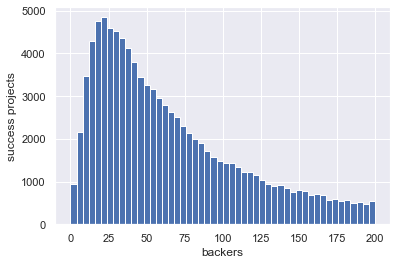

In [1914]:
plt.hist(k.backers[k.state==1], range=(0,200), bins = 50);
print('amount of backers per successful project')
plt.ylabel('success projects')
plt.xlabel('backers');

Answer: Among the successful projects, the largest number of successful ones has a certain number of backers, which is not the largest. It turns out that, in general, successful projects are not the ones that have collected the most backers.

# Feature generation
Lets' generate some more feature that could be useful

### Q2.1 Create a year column that would hold the year. How many projects were in year 2012?

In [1915]:
df['year'] = pd.to_datetime(df['launched']).dt.year
print('projects in 2012 = ',df.query("year == 2012").shape[0]);
df

projects in 2012 =  41109


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pledge2goal,year
ID,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,0.000000,2015
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,0.080700,2017
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,0.004889,2013
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00,0.000200,2012
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00,0.065795,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,0,1,US,25.0,25.0,50000.00,0.000500,2014
999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,0,5,US,155.0,155.0,1500.00,0.103333,2011
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,0,1,US,20.0,20.0,15000.00,0.001333,2010


### Q2.2 Make a column 'duration_days' with number of full days from launch to deadline.
What is median value for this column?

In [1916]:
df['duration_days'] = (pd.to_datetime(df['deadline']) - pd.to_datetime(df['launched'])).dt.days
print('median value for this column = ',int(df.duration_days.median()))
df

median value for this column =  29


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pledge2goal,year,duration_days
ID,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,0.000000,2015,58
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,0.080700,2017,59
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,0.004889,2013,44
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,5000.00,0.000200,2012,29
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,14,US,1283.0,1283.0,19500.00,0.065795,2015,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,0,1,US,25.0,25.0,50000.00,0.000500,2014,29
999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,0,5,US,155.0,155.0,1500.00,0.103333,2011,26
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,0,1,US,20.0,20.0,15000.00,0.001333,2010,45


### Q2.3 Delete mistaken value from column 'country'. What is the value? (CANCELLED QUESTION)

In [1917]:
print(df.country.value_counts()) #glance on values from country
print()
print('N,0" - mistaken value')

US    289669
GB     33214
CA     14508
AU      7681
DE      4057
FR      2873
NL      2807
IT      2775
ES      2204
SE      1718
MX      1632
NZ      1425
DK      1083
IE       793
CH       736
NO       694
BE       597
AT       576
HK       564
SG       521
LU        61
JP        31
Name: country, dtype: int64

N,0" - mistaken value


In [1918]:
df = df.drop(df[df.country == 'N,0"'].index) # delete rows with country 'N,0"'
df.country.value_counts() # result

US    289669
GB     33214
CA     14508
AU      7681
DE      4057
FR      2873
NL      2807
IT      2775
ES      2204
SE      1718
MX      1632
NZ      1425
DK      1083
IE       793
CH       736
NO       694
BE       597
AT       576
HK       564
SG       521
LU        61
JP        31
Name: country, dtype: int64

### Q2.4 Make column 'region' out of column country (america, europe, asia, oceania(including australiza/nz))
Where is the region with the worst conversion rate (percentage of successful projects)

In [1919]:
k = df.country.value_counts()
k

US    289669
GB     33214
CA     14508
AU      7681
DE      4057
FR      2873
NL      2807
IT      2775
ES      2204
SE      1718
MX      1632
NZ      1425
DK      1083
IE       793
CH       736
NO       694
BE       597
AT       576
HK       564
SG       521
LU        61
JP        31
Name: country, dtype: int64

In [1920]:
#df.loc[df['country'] == ("US" or "CA" or "MX"), 'region'] = 'america' # 'or' doesn't work (why?)
df.loc[df['country'] == "US", 'region'] = 'america'
df.loc[df['country'] == "CA", 'region'] = 'america'
df.loc[df['country'] == "MX", 'region'] = 'america'

#df.loc[df['country'] == ("GB" or "DE" or "FR" or "NL" or "IT" or "ES" or "SE" or "DK" or "IE" or "CH" or "NO" or "BE" or "AT" or "LU"), 'region'] = 'europe'
df.loc[df['country'] == "GB", 'region'] = 'europe'
df.loc[df['country'] == "DE", 'region'] = 'europe'
df.loc[df['country'] == "FR", 'region'] = 'europe'
df.loc[df['country'] == "NL", 'region'] = 'europe'
df.loc[df['country'] == "IT", 'region'] = 'europe'
df.loc[df['country'] == "ES", 'region'] = 'europe'
df.loc[df['country'] == "SE", 'region'] = 'europe'
df.loc[df['country'] == "DK", 'region'] = 'europe'
df.loc[df['country'] == "IE", 'region'] = 'europe'
df.loc[df['country'] == "CH", 'region'] = 'europe'
df.loc[df['country'] == "NO", 'region'] = 'europe'
df.loc[df['country'] == "BE", 'region'] = 'europe'
df.loc[df['country'] == "AT", 'region'] = 'europe'
df.loc[df['country'] == "LU", 'region'] = 'europe'

#df.loc[df['country'] == ("AU" or "NZ"), 'region'] = 'oceania'
df.loc[df['country'] == "AU", 'region'] = 'oceania'
df.loc[df['country'] == "NZ", 'region'] = 'oceania'

#df.loc[df['country'] == ("HK" or "SG" or "JP"), 'region'] = 'asia'
df.loc[df['country'] == "HK", 'region'] = 'asia'
df.loc[df['country'] == "SG", 'region'] = 'asia'
df.loc[df['country'] == "JP", 'region'] = 'asia'

In [1921]:
df.count()

name                370219
category            370219
main_category       370219
currency            370219
deadline            370219
goal                370219
launched            370219
pledged             370219
state               370219
backers             370219
country             370219
usd pledged         370219
usd_pledged_real    370219
usd_goal_real       370219
pledge2goal         370219
year                370219
duration_days       370219
region              370219
dtype: int64

In [1922]:
print(df.region.count())
df.region.value_counts()

370219


america    305809
europe      54188
oceania      9106
asia         1116
Name: region, dtype: int64

In [1923]:
#find mean of each category, then sort in asc ordrer and take the max value (end; -1 element)
k = df.groupby('region')['state'].mean().sort_values()
print(k)
print('        reg with worst convers rate = ',k.index[0])

region
oceania    0.269932
europe     0.316731
asia       0.359319
america    0.372223
Name: state, dtype: float64
        reg with worst convers rate =  oceania


### Q2.5 For each main_category leave only the three most popular category and replace other with "other"
What is the most frequent subcategory for design?

In [1924]:

k1 = df.groupby('main_category')['category'].value_counts().reset_index(name='Count')
k2 = k1.groupby(['main_category'])[['category','Count']].apply(pd.DataFrame.nlargest, n=3, columns=['Count'])
k3 = k2.reset_index().drop('level_1', axis=1)
k4 = k3[k3['main_category'] == 'Design']
k5 = k4[k4.index == k4['category'].index[0]].category
print('               the most frequent subcategory for design = ',k5)

               the most frequent subcategory for design =  12    Product Design
Name: category, dtype: object


In [1925]:
result = k2['category'].tolist()
df.loc[~df['category'].isin(result), 'category'] = 'other'

In [1926]:
df.groupby('main_category')['category'].value_counts()

main_category  category    
Art            other           13320
               Art              8155
               Painting         3262
               Illustration     3125
Comics         Comics           4973
                               ...  
Theater        Theater          7036
               Plays            1363
               other            1333
               Musical           906
               Spaces            212
Name: category, Length: 62, dtype: int64

### Q2.6 create the columns "name_length" with length of the name.
What is the biggets length?

In [1927]:
df['name_length'] = df.name.str.len()
df.head(3)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pledge2goal,year,duration_days,region,name_length
ID,,,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,other,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,1533.95,0.000000,2015,58,europe,31
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,other,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,30000.00,0.080700,2017,59,america,45
1000004038,Where is Hank?,other,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,45000.00,0.004889,2013,44,america,14


In [1928]:
print('max = ',df['name_length'].max())

max =  96


# Preprocessing

### Q3.1 Drop the leaking columns
Based on what we have already seen, can you assume what features are leakeges? What is the columns? Drop them


In [1929]:
df.sample(1)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pledge2goal,year,duration_days,region,name_length
ID,,,,,,,,,,,,,,,,,,,
169003291,NEXT GENERATION HIGH PERFORMANCE SOLAR OVEN,Product Design,Design,USD,2014-02-08,40000.0,2013-12-10 22:36:57,2446.0,0,15,US,2446.0,2446.0,40000.0,0.06115,2013,59,america,43


In [1930]:
# drop the leaking features
df = df.reset_index()
data1 = df.copy()
df.drop(['pledged','backers','usd pledged','usd_pledged_real','pledge2goal'], axis='columns', inplace=True)
df.sample(1)

,ID,name,category,main_category,currency,deadline,goal,launched,state,country,usd_goal_real,year,duration_days,region,name_length
23459,1121874117,Help Fund a Professional Music Video for Teen ...,other,Film & Video,USD,2014-12-04,500.0,2014-11-24 03:25:24,0,US,500.0,2014,9,america,53


### Q3.2 Deal with the categorical features.
Lets drop some more columns for now (name, deadline, launched, country, usd_goal_real). Note: you can re-use these columns in the Q5 section. 
Preprocess the rest of categorical columns. How many columns do you have now?

In [1931]:
# drop some more columns for now (name, deadline, launched, country, usd_goal_real)
df.drop(['ID','name','deadline','launched','usd_goal_real','region'], axis='columns', inplace=True)
print('columns amount = ',df.shape[1])

columns amount =  9


In [1932]:
df.sample(1)

,category,main_category,currency,goal,state,country,year,duration_days,name_length
313968,other,Film & Video,GBP,2500.0,0,GB,2014,19,39


In [1933]:
num_features = ['goal','year','duration_days','name_length']
cat_features = ['category', 'main_category', 'currency','country']
X, y = df[[*num_features, *cat_features]], df['state'] # define X,y

In [1934]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
encoded_features = pd.DataFrame(ohe.fit_transform(X[[*cat_features]]))
ohe.categories_

[array(['Accessories', 'Apparel', 'Apps', 'Art', "Children's Books",
        'Comic Books', 'Comics', 'Crafts', 'DIY', 'Dance', 'Design',
        'Documentary', 'Drinks', 'Fashion', 'Fiction', 'Film & Video',
        'Food', 'Games', 'Graphic Design', 'Graphic Novels',
        'Illustration', 'Indie Rock', 'Journalism', 'Music', 'Musical',
        'Nonfiction', 'Painting', 'People', 'Performances', 'Photobooks',
        'Photography', 'Plays', 'Print', 'Product Design', 'Restaurants',
        'Rock', 'Shorts', 'Spaces', 'Tabletop Games', 'Technology',
        'Theater', 'Video Games', 'Web', 'Woodworking', 'other'],
       dtype=object),
 array(['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion',
        'Film & Video', 'Food', 'Games', 'Journalism', 'Music',
        'Photography', 'Publishing', 'Technology', 'Theater'], dtype=object),
 array(['AUD', 'CAD', 'CHF', 'DKK', 'EUR', 'GBP', 'HKD', 'JPY', 'MXN',
        'NOK', 'NZD', 'SEK', 'SGD', 'USD'], dtype=object),
 array(['AT', 'AU

In [1935]:
category_cols = [f'category_{cat}' for cat in ohe.categories_[0]]
main_category_cols = [f'main_category_{cat}' for cat in ohe.categories_[1]]
currency_cols = [f'currency_{cat}' for cat in ohe.categories_[2]]
country_cols = [f'country_{cat}' for cat in ohe.categories_[3]]

In [1936]:
dummy_cols_names = [*category_cols, *main_category_cols,*currency_cols, *country_cols]
encoded_features.columns = dummy_cols_names
encoded_features

,category_Accessories,category_Apparel,category_Apps,category_Art,category_Children's Books,category_Comic Books,category_Comics,category_Crafts,category_DIY,category_Dance,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
370215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
370216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
370217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [1937]:
X.drop(['category', 'main_category', 'currency','country'], axis=1, inplace=True)

C:\Users\kriku\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [1938]:
X = pd.concat([X, encoded_features], axis=1)

In [1939]:
X

,goal,year,duration_days,name_length,category_Accessories,category_Apparel,category_Apps,category_Art,category_Children's Books,category_Comic Books,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1000.0,2015,58,31,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30000.0,2017,59,45,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,45000.0,2013,44,14,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5000.0,2012,29,49,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,19500.0,2015,55,58,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370214,50000.0,2014,29,49,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
370215,1500.0,2011,26,9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
370216,15000.0,2010,45,71,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
370217,15000.0,2016,30,24,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [1940]:
print('columns amount = ',X.shape[1])

columns amount =  100


### Q3.3 Split the dataset
Separate the target column (state) without stratification and with random state 42 and test size 0.2. How many of successful projects in train set?

In [1941]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [1942]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(296175, 100) (74044, 100) (296175,) (74044,)


In [1943]:
print('         successful prjcts in train = ', y_train.value_counts()[1])

         successful prjcts in train =  107134


### Q3.4 Scale the numeric columns with standard scaler
What is max number in goal field after scaling?

In [1944]:
#about train

In [1945]:
X_train.sample(1)

,goal,year,duration_days,name_length,category_Accessories,category_Apparel,category_Apps,category_Art,category_Children's Books,category_Comic Books,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
350514,700.0,2012,29,32,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [1946]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train[num_features])
X_train[num_features] = scaler.transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

#normalized_x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns) # another way

<ipython-input-1946-1a7e334f4560>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_features] = scaler.transform(X_train[num_features])
C:\Users\kriku\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-1946-1a7e334f4560>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [1947]:
print('                max number in goal field after scaling = ',round(X_train.goal.max(),3))

                max number in goal field after scaling =  93.264


In [1948]:
#LR = LogisticRegression(C=0.01, solver='liblinear').fit(normalized_x_train, y_train)

#normalized_x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)
#y_test_pred = LR.predict(normalized_x_test)

# Feature selection

### Q4.1 Estimate feature importance by Anova
What is the two most important features by anova with f classifier?

In [1949]:
from sklearn.feature_selection import SelectKBest, f_classif

In [1950]:
# ANOVA
selector = SelectKBest(f_classif, k=1)
selector.fit(X_train, y_train)
# SelectKBest just selects the specified number of features with the highest scores 
print(X_train.shape) 
X_reduced = selector.transform(X_train)
print(X_reduced.shape)
# and what about scores?
print(selector.scores_)
# it selects the wrong variable!

(296175, 100)
(296175, 1)
[1.96703514e+02 2.01478344e+03 2.26805183e+02 1.32018640e+03
 3.08511241e+00 6.32766606e+02 1.99224454e+03 7.99289927e+01
 4.25491135e+00 5.20593537e+02 3.68042616e+02 1.89273231e+02
 1.40593911e+02 7.87321340e+02 4.71998103e+00 2.70812793e+00
 1.00890214e+02 3.16449607e+02 4.30002415e+02 2.41218912e+01
 2.10447779e+02 1.54005511e+02 3.42766920e-01 2.47835174e+02
 2.76875043e+02 1.51104390e+03 3.48510128e+01 6.73531582e+02
 7.12474713e+01 2.55932468e+02 1.73499234e+00 8.73900256e+01
 2.23202422e+02 8.77280590e+00 2.79535714e+01 2.32626521e+02
 4.66761990e+01 4.56228098e-01 3.66702455e+02 6.10010874e+02
 1.47867704e+03 5.17824689e-02 1.96775117e+03 6.84836654e+02
 1.72976552e+03 1.00493722e+03 1.36436193e+03 4.14494733e+01
 8.64424941e+01 2.69511122e+02 1.33306203e+03 4.05558688e+02
 9.39979550e+02 2.37017343e+00 1.03945092e+03 8.17427003e+01
 1.10220050e+03 2.15260729e-01 3.29348835e+02 3.38015828e+03
 1.11333034e+02 3.46115578e+02 3.10861585e+03 2.24293020e+0

In [1951]:
a = selector.scores_
max1 = np.argmax(a) # first max
print('1st feature number = ',X_train.columns[max1])
a[max1]=0
max2 = np.argmax(a) # second max
print('2nd feature number = ',X_train.columns[max2])

1st feature number =  main_category_Music
2nd feature number =  main_category_Technology


## Build a model with logistic regression

Use l2 penalty and search for optimal C in np.logspace(-2, 4, 7).

In [1952]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid = {
        "C":np.logspace(-2,4,7), 
        "penalty":["l2"]
        }
logreg = LogisticRegression(max_iter = 500)
logreg_cv = GridSearchCV(logreg, grid, cv=5 , n_jobs= -1, verbose=50 )
logreg_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  13 out of  35 | elapsed:  1.4min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  14 out of

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
                         'penalty': ['l2']},
             verbose=50)

### Q4.2 What is an optimal C for l2 regularization?

In [2011]:
logreg_cv.best_estimator_.C

1.0

### Q4.3 What is the accuracy for this params?

In [1954]:
from sklearn.metrics import accuracy_score
y_pred_test = logreg_cv.best_estimator_.predict(X_test)
print(accuracy_score(y_test, y_pred_test))

0.6780833018205391


### Q4.4 What is the two most important features by logistic regression estimation?

country_JP 
 currency_JPY 

Feature: 0, Score: -13.35407
Feature: 1, Score: -0.07423
Feature: 2, Score: -1.24630
Feature: 3, Score: 0.15014
Feature: 4, Score: 0.45724
Feature: 5, Score: -0.25294
Feature: 6, Score: -1.88528
Feature: 7, Score: 0.05003
Feature: 8, Score: -0.15639
Feature: 9, Score: -0.02521
Feature: 10, Score: -0.43841
Feature: 11, Score: -0.11089
Feature: 12, Score: -0.53346
Feature: 13, Score: 0.95447
Feature: 14, Score: 0.09623
Feature: 15, Score: 0.17886
Feature: 16, Score: 0.22245
Feature: 17, Score: -0.04613
Feature: 18, Score: -0.65747
Feature: 19, Score: 0.04597
Feature: 20, Score: 0.26027
Feature: 21, Score: -0.07272
Feature: 22, Score: -0.01474
Feature: 23, Score: -0.14032
Feature: 24, Score: 0.40425
Feature: 25, Score: 0.64156
Feature: 26, Score: -0.08153
Feature: 27, Score: 0.10701
Feature: 28, Score: -0.21732
Feature: 29, Score: -0.53559
Feature: 30, Score: -0.28068
Feature: 31, Score: -0.16658
Feature: 32, Score: 0.82949
Feature: 33, Score: 0.82596
Feature: 

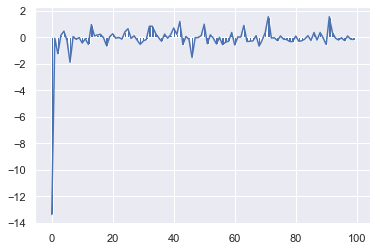

In [1955]:
import numpy as np

coefs = logreg_cv.best_estimator_.coef_[0]

top_two = np.argpartition(coefs, -2)[-2:]
print(X_train.columns[top_two[0]],'\n', X_train.columns[top_two[1]], '\n')
plt.plot(np.arange(0,100), coefs)

importance = coefs # summarize feature importance

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [1956]:
a = importance
max1 = np.argmax(a) # first max
print('1st feature number = ',X_train.columns[max1])
a[max1]=0
max2 = np.argmax(a) # second max
print('2nd feature number = ',X_train.columns[max2])

1st feature number =  currency_JPY
2nd feature number =  country_JP


### Q4.5 Build roc curve and calculate roc-auc score. What is the roc-auc score?

In [1957]:
y_prob = logreg_cv.best_estimator_.predict_proba(X_test)
y_probs = y_prob[:,1]

Text(0.5, 1.0, 'ROC curve: ROC AUC=0.70')

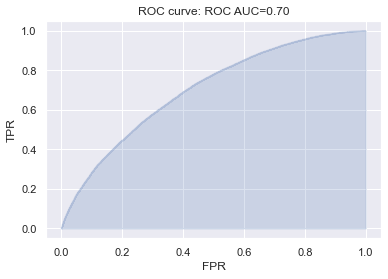

In [1958]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.step(fpr,tpr, color ='b', alpha = 0.2, where='post')
plt.fill_between(fpr, tpr, alpha = 0.2, color ='b')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve: ROC AUC={0:0.2f}'.format(roc_auc_score(y_test,y_probs)))

## Build a random forest model
Use random state 42, maximum depth from 2 to 15, and number of estimators in `[10, 20, 50, 100, 200]`

In [1959]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm_notebook
import numpy as np

In [1960]:
model = RandomForestClassifier(n_estimators=10, max_features=8, max_depth=6, random_state=42) 

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.6536248716979094


In [1961]:
rs = []
for m in model.estimators_:
    rs.append(m.random_state)
print(rs)

[1608637542, 1273642419, 1935803228, 787846414, 996406378, 1201263687, 423734972, 415968276, 670094950, 1914837113]


In [1962]:
def rf_train_test_accuracy(param_name, param_grid, **params):
    """Returns train and test perfomance of a RandomForest for
    different values (param_grid) of a hyperparameter (param_name)."""
    
    train_score, test_score = [], []
    clf = RandomForestClassifier(n_estimators=10, max_features=8, max_depth=6, random_state=42, n_jobs=-1)
    if params:
        clf.set_params(**params)
    
    for param_value in tqdm_notebook(param_grid):
        clf.set_params(**{param_name: param_value})
        clf.fit(X_train, y_train)

        train_score.append(accuracy_score(y_train, clf.predict(X_train)))
        test_score.append(accuracy_score(y_test, clf.predict(X_test)))
    return train_score, test_score

### Q4.6 What is an optimal depth and number of trees?

# Trees

In [1963]:
train_accuracy, test_accuracy = rf_train_test_accuracy('n_estimators', range(1, 50, 2))

<ipython-input-1962-7960aa440428>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for param_value in tqdm_notebook(param_grid):


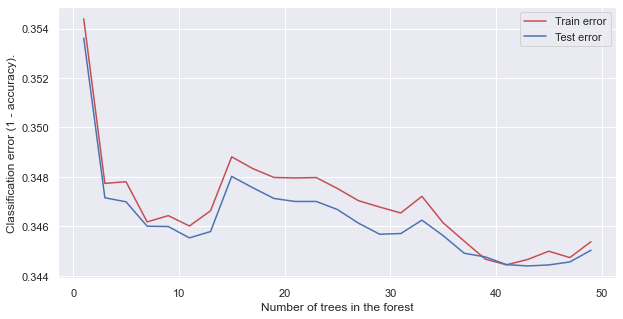

In [1964]:
plt.figure(figsize=(10,5))
plt.plot(list(range(1,50,2)), 1-np.array(train_accuracy), c='r', label='Train error')
plt.plot(list(range(1,50,2)), 1-np.array(test_accuracy), c='b', label='Test error')
plt.xlabel('Number of trees in the forest')
plt.ylabel('Classification error (1 - accuracy).')
plt.legend();

# Depth

In [1965]:
train_accuracy, test_accuracy = rf_train_test_accuracy('max_depth', range(1, 30))

<ipython-input-1962-7960aa440428>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for param_value in tqdm_notebook(param_grid):


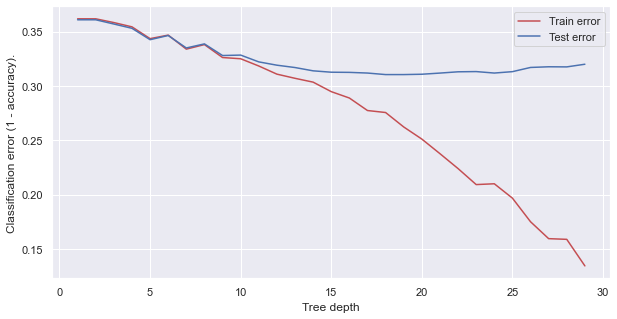

In [1966]:
plt.figure(figsize=(10,5))
plt.plot(list(range(1,30)), 1-np.array(train_accuracy), c='r', label='Train error')
plt.plot(list(range(1,30)), 1-np.array(test_accuracy), c='b', label='Test error')
plt.xlabel('Tree depth')
plt.ylabel('Classification error (1 - accuracy).')
plt.legend();

### Q4.7 What is the accuracy for this params?

In [1967]:
model = RandomForestClassifier(n_estimators=8, max_features=8, max_depth=10, random_state=42) 

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(round(accuracy_score(y_test, y_pred),3))

0.673


### Q4.8 Build precision-recall curve. What is the precision for recall 0.5?

In [1968]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create a simple classifier
clf = RandomForestClassifier(n_estimators=8, max_features=8, max_depth=10, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=8, n_estimators=8, n_jobs=-1,
                       random_state=42)

(0.0, 1.0)

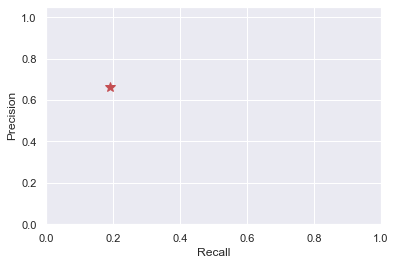

In [1969]:
from sklearn.metrics import precision_score, recall_score

y_pred = clf.predict(X_test)
plt.plot(recall_score(y_test, y_pred), 
         precision_score(y_test, y_pred), 
         '*r', ms=10
         )
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [1970]:
y_pred = clf.predict(X_test)
print(y_pred[:5])

y_prob = clf.predict_proba(X_test)
# # Note that we used predict_proba instead of predict
print(y_prob[:5])

[0 0 0 0 0]
[[0.7228242  0.2771758 ]
 [0.67133325 0.32866675]
 [0.62316112 0.37683888]
 [0.51760882 0.48239118]
 [0.65236191 0.34763809]]


In [1971]:
y_prob = y_prob[:, 1]

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.42')

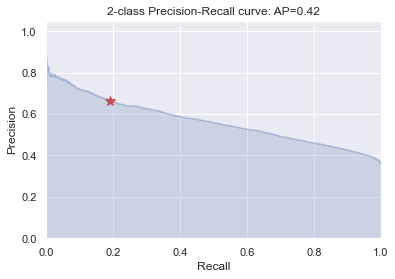

In [1972]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.step(recall, precision, color='b', alpha=0.2, where='post')

plt.plot(recall_score(y_test, y_pred), 
         precision_score(y_test, y_pred), 
         '*r', ms=10
         )
plt.fill_between(recall, precision, alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision_score(y_test, y_pred)))

### Q4.9 What is the two most important features by random forest?

In [1973]:
a = clf.feature_importances_
max1 = np.argmax(a) # first max
print('1st feature number = ',X_train.columns[max1])
a[max1]=0
max2 = np.argmax(a) # second max
print('2nd feature number = ',X_train.columns[max2])

1st feature number =  goal
2nd feature number =  duration_days


------

# Build the stronger model

In [1974]:
data = data1.copy()

In [1975]:
# dataset from step 3.1
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'pledge2goal',
       'year', 'duration_days', 'region', 'name_length'],
      dtype='object')

### Q5.1 Generate two (or more) meaningfull features

In [1976]:
# generate new feature 1
data['new_feature_1'] = pd.qcut(data['year'],[0, 0.15, 0.3, 0.45, 0.60, 0.75, 1.0],labels=False)

In [1977]:
# generate new feature 2
data['new_feature_2'] = pd.qcut(data['name_length'],[0, 0.15, 0.3, 0.45, 0.60, 0.75, 1.0],labels=False)

In [1978]:
# result dataset columns
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'pledge2goal',
       'year', 'duration_days', 'region', 'name_length', 'new_feature_1',
       'new_feature_2'],
      dtype='object')

In [1979]:
# drop columns
data.drop(['ID','name','deadline','launched','pledged','backers','currency','usd pledged'], axis='columns', inplace=True)
data.drop(['usd_pledged_real','goal','pledge2goal','year','region','name_length'], axis='columns', inplace=True)

In [1980]:
# result dataset columns
data.columns

Index(['category', 'main_category', 'state', 'country', 'usd_goal_real',
       'duration_days', 'new_feature_1', 'new_feature_2'],
      dtype='object')

In [1981]:
# replace inp->nan
data = data.replace(np.inf, np.nan)

In [1982]:
# there are a lot of NaNs
data.isnull().sum().sum()

0

In [1983]:
# delete them
data = data.dropna()

In [1984]:
# there isn't NaNs
data.isnull().sum().sum()

0

In [1985]:
# divide features into 2 categories
num_features_xgb = ['usd_goal_real','duration_days','new_feature_1','new_feature_2']
cat_features_xgb = ['category', 'main_category', 'country']
X_xgb, y_xgb = data[[*num_features_xgb, *cat_features_xgb]], data['state'] # define X,y

In [1986]:
# features encoding...
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
encoded_features = pd.DataFrame(ohe.fit_transform(X_xgb[[*cat_features_xgb]]))
ohe.categories_

[array(['Accessories', 'Apparel', 'Apps', 'Art', "Children's Books",
        'Comic Books', 'Comics', 'Crafts', 'DIY', 'Dance', 'Design',
        'Documentary', 'Drinks', 'Fashion', 'Fiction', 'Film & Video',
        'Food', 'Games', 'Graphic Design', 'Graphic Novels',
        'Illustration', 'Indie Rock', 'Journalism', 'Music', 'Musical',
        'Nonfiction', 'Painting', 'People', 'Performances', 'Photobooks',
        'Photography', 'Plays', 'Print', 'Product Design', 'Restaurants',
        'Rock', 'Shorts', 'Spaces', 'Tabletop Games', 'Technology',
        'Theater', 'Video Games', 'Web', 'Woodworking', 'other'],
       dtype=object),
 array(['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion',
        'Film & Video', 'Food', 'Games', 'Journalism', 'Music',
        'Photography', 'Publishing', 'Technology', 'Theater'], dtype=object),
 array(['AT', 'AU', 'BE', 'CA', 'CH', 'DE', 'DK', 'ES', 'FR', 'GB', 'HK',
        'IE', 'IT', 'JP', 'LU', 'MX', 'NL', 'NO', 'NZ', 'SE', 'SG', 'US']

In [1987]:
category_cols = [f'category_{cat}' for cat in ohe.categories_[0]]
main_category_cols = [f'main_category_{cat}' for cat in ohe.categories_[1]]
#currency_cols = [f'currency_{cat}' for cat in ohe.categories_[2]]
country_cols = [f'country_{cat}' for cat in ohe.categories_[2]]


In [1988]:
dummy_cols_names = [*category_cols, *main_category_cols,*country_cols]
                    #, *region_cols]
encoded_features.columns = dummy_cols_names
encoded_features

,category_Accessories,category_Apparel,category_Apps,category_Art,category_Children's Books,category_Comic Books,category_Comics,category_Crafts,category_DIY,category_Dance,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
370215,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
370216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
370217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [1989]:
# drop category features
X_xgb.drop(['category', 'main_category', 'country'], axis=1, inplace=True)

C:\Users\kriku\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [1990]:
# concat X, encoded_features
X_xgb = pd.concat([X_xgb, encoded_features], axis=1)

In [1991]:
X_xgb = X_xgb.drop(X_xgb.index[370117:]) # there are a lot of NaNs, delete them
y_xgb = y_xgb.drop(y_xgb.index[370117:]) # there are a lot of NaNs, delete them
X_xgb

,usd_goal_real,duration_days,new_feature_1,new_feature_2,category_Accessories,category_Apparel,category_Apps,category_Art,category_Children's Books,category_Comic Books,...,country_IT,country_JP,country_LU,country_MX,country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1533.95,58,3,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30000.00,59,5,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,45000.00,44,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5000.00,29,0,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,19500.00,55,3,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370112,2000.00,89,0,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
370113,20000.00,45,2,5,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
370114,5572.07,29,4,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
370115,1030.28,59,3,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [1992]:
# split dataset into train, test
from sklearn.model_selection import train_test_split
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)

In [1993]:
# scaling num features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train_xgb[num_features_xgb])
X_train_xgb[num_features_xgb] = scaler.transform(X_train_xgb[num_features_xgb])
X_test_xgb[num_features_xgb] = scaler.transform(X_test_xgb[num_features_xgb])

<ipython-input-1993-ef2fd90c68ab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_xgb[num_features_xgb] = scaler.transform(X_train_xgb[num_features_xgb])
C:\Users\kriku\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-1993-ef2fd90c68ab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

### Q5.2 Train an xgboost, that's beat random forest

In [1994]:
# train xgboost and chech it's accuracy_score
from xgboost import XGBClassifier
clf_xgb = XGBClassifier()

clf_xgb.fit(X_train_xgb, y_train_xgb)
y_pred_xgb = clf_xgb.predict(X_test_xgb)
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test_xgb, y_pred_xgb),3))

0.7


In [1995]:
a = clf_xgb.feature_importances_
max1 = np.argmax(a) # first max
print('1st feature number = ',X_train.columns[max1])
a[max1]=0
max2 = np.argmax(a) # second max
print('2nd feature number = ',X_train.columns[max2])

1st feature number =  main_category_Theater
2nd feature number =  main_category_Comics
